In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import Utils as utils
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler

c:\Users\aydin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


### DISPLAY SETTINGS

In [2]:
# For output settings
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 700)

# For warnings
warnings.filterwarnings("ignore")

### LOAD DATAFRAME

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.loc[(df['intensity'] < 0.60), "cat_intensity"] = 'Az_Yogun'
df.loc[(df['intensity'] >= 0.60) & (df['intensity'] < 0.80), "cat_intensity"] = 'Normal'
df.loc[(df['intensity'] >= 0.80) & (df['intensity'] < 0.99), "cat_intensity"] = 'Yogun'
df.loc[(df['intensity'] >= 0.99 ), "cat_intensity"] = 'Cok_Yogun'

df['line_new']=LabelEncoder().fit_transform(df['line'])

### CHECK DATAFRAME

In [5]:
utils.check_df(df)

##################### Shape #####################
(17815, 10)
##################### Types #####################
line                    object
month                    int64
year                     int64
transport_type_id        int64
transition_hour        float64
number_of_passage        int64
number_of_passenger      int64
intensity              float64
cat_intensity           object
line_new                 int32
dtype: object
##################### Head #####################
                                  line  month  year  transport_type_id  transition_hour  number_of_passage  number_of_passenger  intensity cat_intensity  line_new
0                    EMINONU-OKMEYDANI      1  2021                  1        13.348371              33236                32413   0.975238         Yogun         1
1         KARTAL-AYDOS HILAL KONUTLARI      1  2021                  1        13.732749              30325                29276   0.965408         Yogun         2
2                A.YESEVI 

### BOXPLOTS

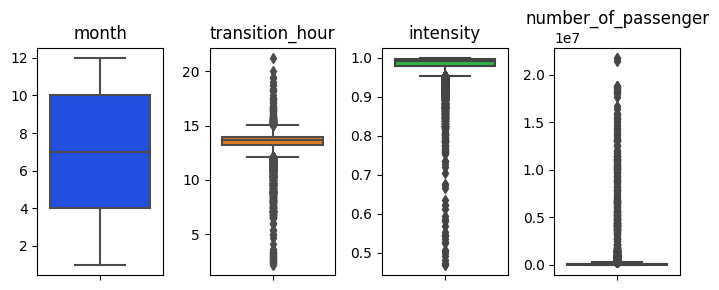

In [6]:
utils.numeric_variables_boxplot(df,['month','transition_hour','intensity','number_of_passenger'])

In [7]:
df.groupby('cat_intensity')['number_of_passenger'].mean()

cat_intensity
Az_Yogun      46089.894737
Cok_Yogun    135877.931359
Normal        32512.315789
Yogun        271854.439093
Name: number_of_passenger, dtype: float64

In [8]:
from statistics import mode
df.groupby(['cat_intensity', 'year'])['transition_hour'].agg(lambda x: mode(x))

cat_intensity  year
Az_Yogun       2021    13.424779
               2022    14.213592
Cok_Yogun      2021    11.500000
               2022    11.500000
Normal         2021    14.325424
               2022    14.551020
Yogun          2021    11.500000
               2022    11.500000
Name: transition_hour, dtype: float64

### VISUALIZE CATEGORIC VARIABLES

    month     Ratio
11   1650  9.261858
12   1642  9.216952
9    1634  9.172046
10   1630  9.149593
7    1628  9.138367
3    1610  9.037328
6    1609  9.031715
8    1608  9.026102
1    1603  8.998035
5    1601  8.986809
4    1600  8.981196
##########################################


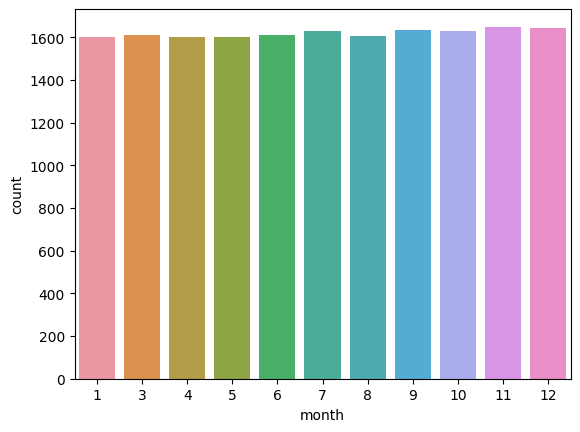

      year     Ratio
2022  9060  50.85602
2021  8755  49.14398
##########################################


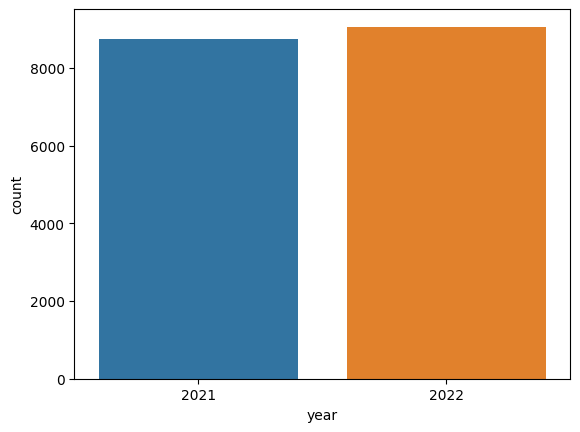

   transport_type_id      Ratio
1              16641  93.410048
3                770   4.322200
2                404   2.267752
##########################################


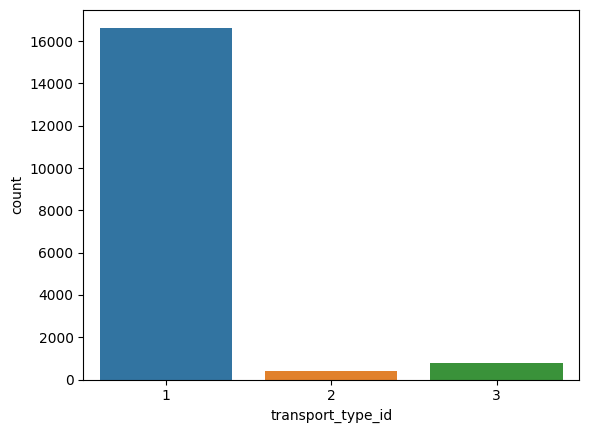

           cat_intensity      Ratio
Cok_Yogun           9557  53.645804
Yogun               8201  46.034241
Normal                38   0.213303
Az_Yogun              19   0.106652
##########################################


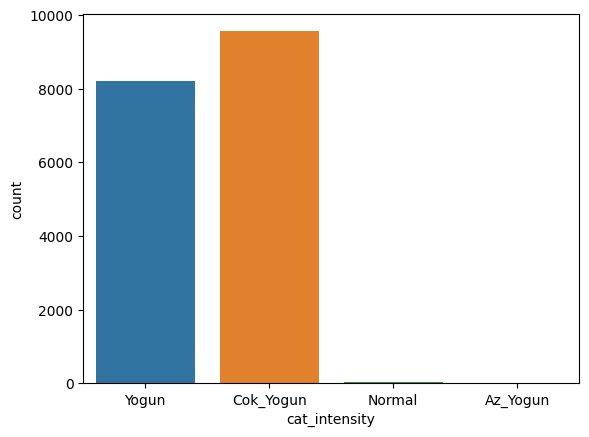

In [9]:
for col in ['month','year','transport_type_id','cat_intensity']:
    utils.cat_summary(df,col,plot = True)

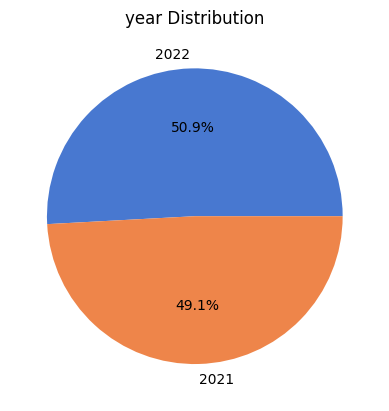

In [10]:
utils.plot_distributions(df,'year',target_pie=True,target='year')

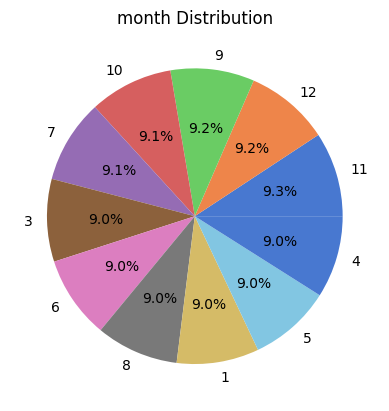

In [11]:
utils.plot_distributions(df,'month',target_pie=True,target='month')

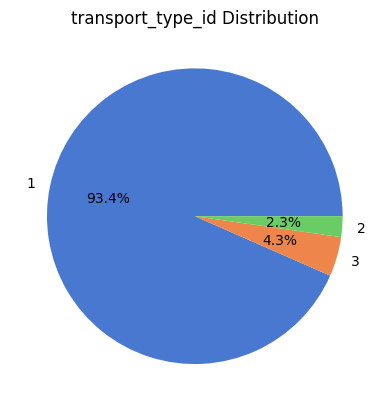

In [12]:
utils.plot_distributions(df,'transport_type_id',target_pie=True,target='transport_type_id')

### CAKE

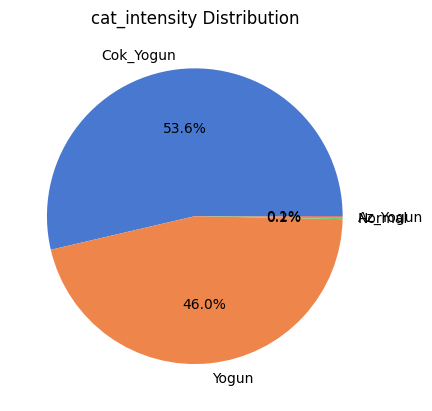

In [13]:
utils.plot_distributions(df,'cat_intensity',target_pie=True)

### VISUALIZE NUMERIC VARIABLES

In [14]:

def plot_distributions(dataframe, columns,kde=False, log_transform=False, label_angle=0, 
                       figsize = (8,3) , order_cats= False, target_pie=False, alert=False): 

    if alert == True:
        pie_palette = alert_palette
    else:
        pie_palette = sequential_palette
        
    if target_pie == True:
        ax = dataframe[columns].value_counts().plot.pie(autopct='%1.1f%%',
                                              textprops={'fontsize':10},
                                              colors=pie_palette
                                              ).set_title(f"{cnf.target} Distribution")
        plt.ylabel('')
        plt.show()

    else:
        for col in columns:
            if log_transform == True:
                x = np.log10(dataframe[col])
                title = f'{col} - Log Transformed'
            else:
                x = dataframe[col]
                title = f'{col}'
            
            if order_cats == True:
                
                print(pd.DataFrame({col: dataframe[col].value_counts(),
                            "Ratio": 100 * dataframe[col].value_counts() / len(dataframe)}))
            
                print("##########################################")
                
                print(f"NA in {col} : {dataframe[col].isnull().sum()}")
                
                print("##########################################")

                labels = dataframe[col].value_counts(ascending=False).index
                values = dataframe[col].value_counts(ascending=False).values
                
                plt.subplots(figsize=figsize)
                plt.tight_layout()
                plt.xticks(rotation=label_angle)
                sns.barplot(x=labels,
                            y=values,
                            palette = sequential_palette)
                        
            else:   
            
                quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
                print(dataframe[col].describe(quantiles).T)

                plt.subplots(figsize=figsize)
                plt.tight_layout()
                plt.xticks(rotation=label_angle)
                sns.histplot(x,
                        bins=50,
                        kde=kde,
                        color = sequential_palette[0])

    
            plt.title(title)
            plt.show()
bright_palette = sns.color_palette('bright')
muted_palette = sns.color_palette('muted')
sequential_palette = sns.color_palette('light:dodgerblue_r',9)
alert_palette = sns.color_palette('Reds_r',9)
paired_palette = sns.color_palette('Paired')
def numeric_variables_boxplot(df, num_cols, target=None, alert=False):

    if alert == True:
        palette = alert_palette
    else:
        palette = bright_palette
        
    if target == None:
        
        fig, [ax1,ax2,ax3,ax4] = plt.subplots(1,4, figsize=(7,3))

        for col, ax, i in zip(num_cols, [ax1,ax2,ax3,ax4], range(4)):
            sns.boxplot(df[col], 
                        color=palette[i], 
                        ax=ax
                        ).set_title(col)
            
        for ax in [ax1,ax2,ax3,ax4]:
            ax.set_xticklabels([])
    else:
        for col in num_cols:
            plt.subplots(figsize=(7,3))
            sns.boxplot(x=df[target], 
                                y=df[col],
                                hue=df[target],
                                dodge=False, 
                                fliersize=3,
                                linewidth=0.7,
                                palette=palette)
            plt.title(col)
            plt.xlabel('')
            plt.ylabel('')
            plt.xticks(rotation=45)
            plt.legend('',frameon=False)

    plt.tight_layout()
    plt.show()

count    1.781500e+04
mean     2.031533e+05
std      1.068959e+06
min      1.000000e+02
5%       2.528400e+03
10%      4.324800e+03
20%      9.065200e+03
30%      1.686060e+04
40%      2.756860e+04
50%      4.230600e+04
60%      6.659100e+04
70%      1.050882e+05
80%      1.719050e+05
90%      2.993346e+05
95%      4.565884e+05
99%      3.808048e+06
max      2.263521e+07
Name: number_of_passage, dtype: float64


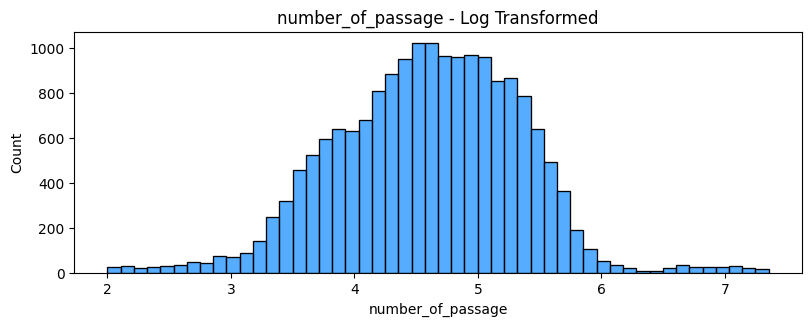

In [15]:
plot_distributions(df,['number_of_passage'],log_transform=True)

count    1.781500e+04
mean     1.981574e+05
std      1.035408e+06
min      9.300000e+01
5%       2.481800e+03
10%      4.261000e+03
20%      8.924000e+03
30%      1.666180e+04
40%      2.722540e+04
50%      4.149800e+04
60%      6.543680e+04
70%      1.031846e+05
80%      1.687276e+05
90%      2.925598e+05
95%      4.429757e+05
99%      3.782784e+06
max      2.180668e+07
Name: number_of_passenger, dtype: float64


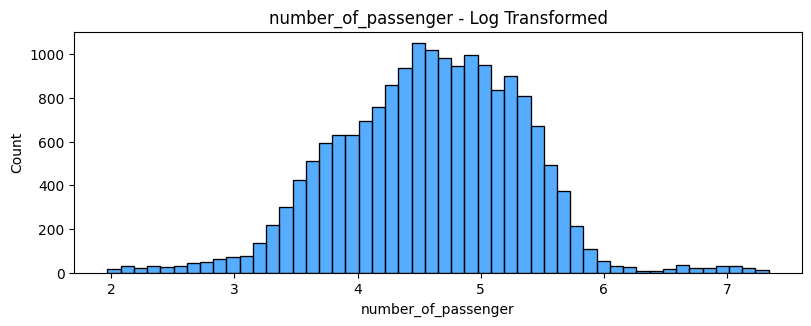

In [16]:
plot_distributions(df,['number_of_passenger'], log_transform=True)

### 3D VISUALIZE

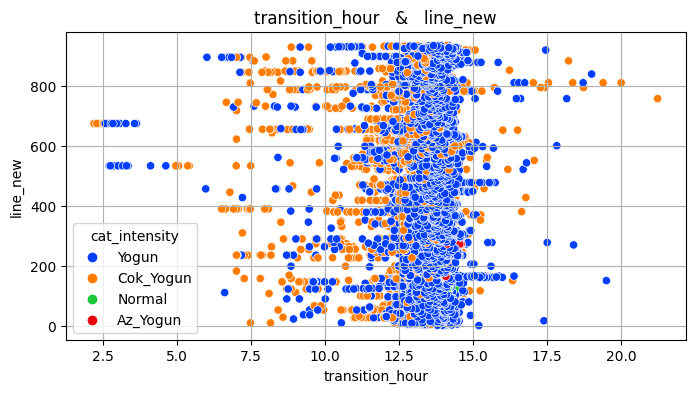

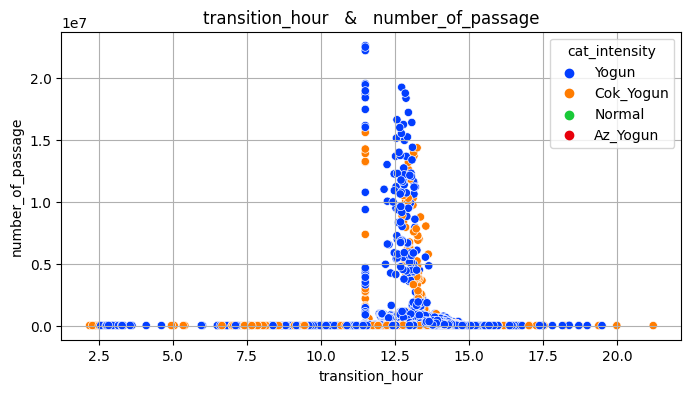

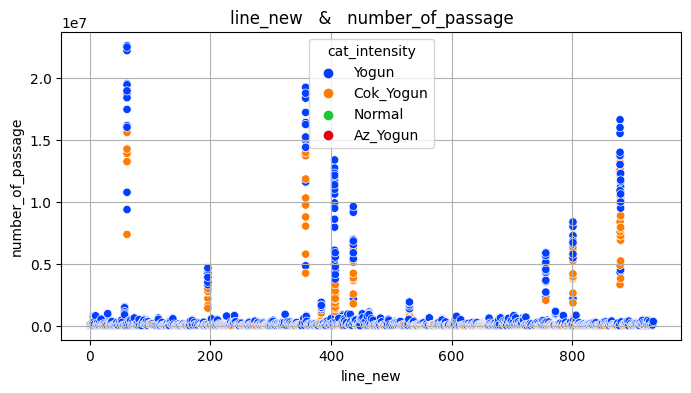

In [17]:
utils.numcols_target_corr(df,['transition_hour','line_new','number_of_passage'])